training pandas and seaborn

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

import warnings
warnings.filterwarnings('ignore')

# default plot size up
plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")#pretty graphs

In [2]:
df = pd.read_csv('penguins_sizes.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.cov()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,29.807054,-2.534234,50.375765,2605.591912
culmen_depth_mm,-2.534234,3.899808,-16.212950,-747.370093
flipper_length_mm,50.375765,-16.212950,197.731792,9824.416062
body_mass_g,2605.591912,-747.370093,9824.416062,643131.077327


In [4]:
df.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [5]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction.

def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
                                                               "There are " + str(mis_val_table_ren_columns.shape[0]) +
           " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns
missing= missing_values_table(df)
missing

Your selected dataframe has 7 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
sex,10,2.9
culmen_length_mm,2,0.6
culmen_depth_mm,2,0.6
flipper_length_mm,2,0.6
body_mass_g,2,0.6


In [6]:
#Imputation des valeurs manquantes
from sklearn.impute import SimpleImputer
#most frequent = imputation par la moyenne
imputer = SimpleImputer(strategy='most_frequent')
df.iloc[:,:] = imputer.fit_transform(df) #méthode fit_transform : fit to data, then transform it.

In [7]:
#on vérifie
df.isnull().sum()
#alias : df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [8]:
#labelisation des données str
lb = LabelEncoder()
df["sex"]= lb.fit_transform(df["sex"])
df['sex'][:5]

0    2
1    1
2    1
3    2
4    1
Name: sex, dtype: int32

<Axes: >

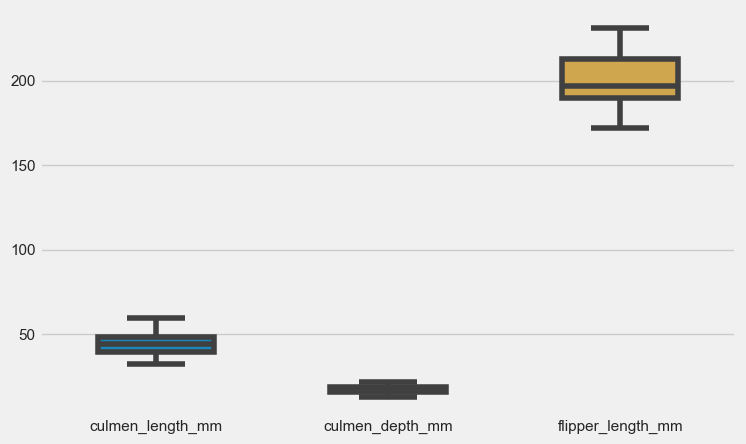

In [9]:
#Visu
df1 = df[['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm']]
#boîtes avec incertitudes
sns.boxplot(data=df1, width=0.5,fliersize=5)

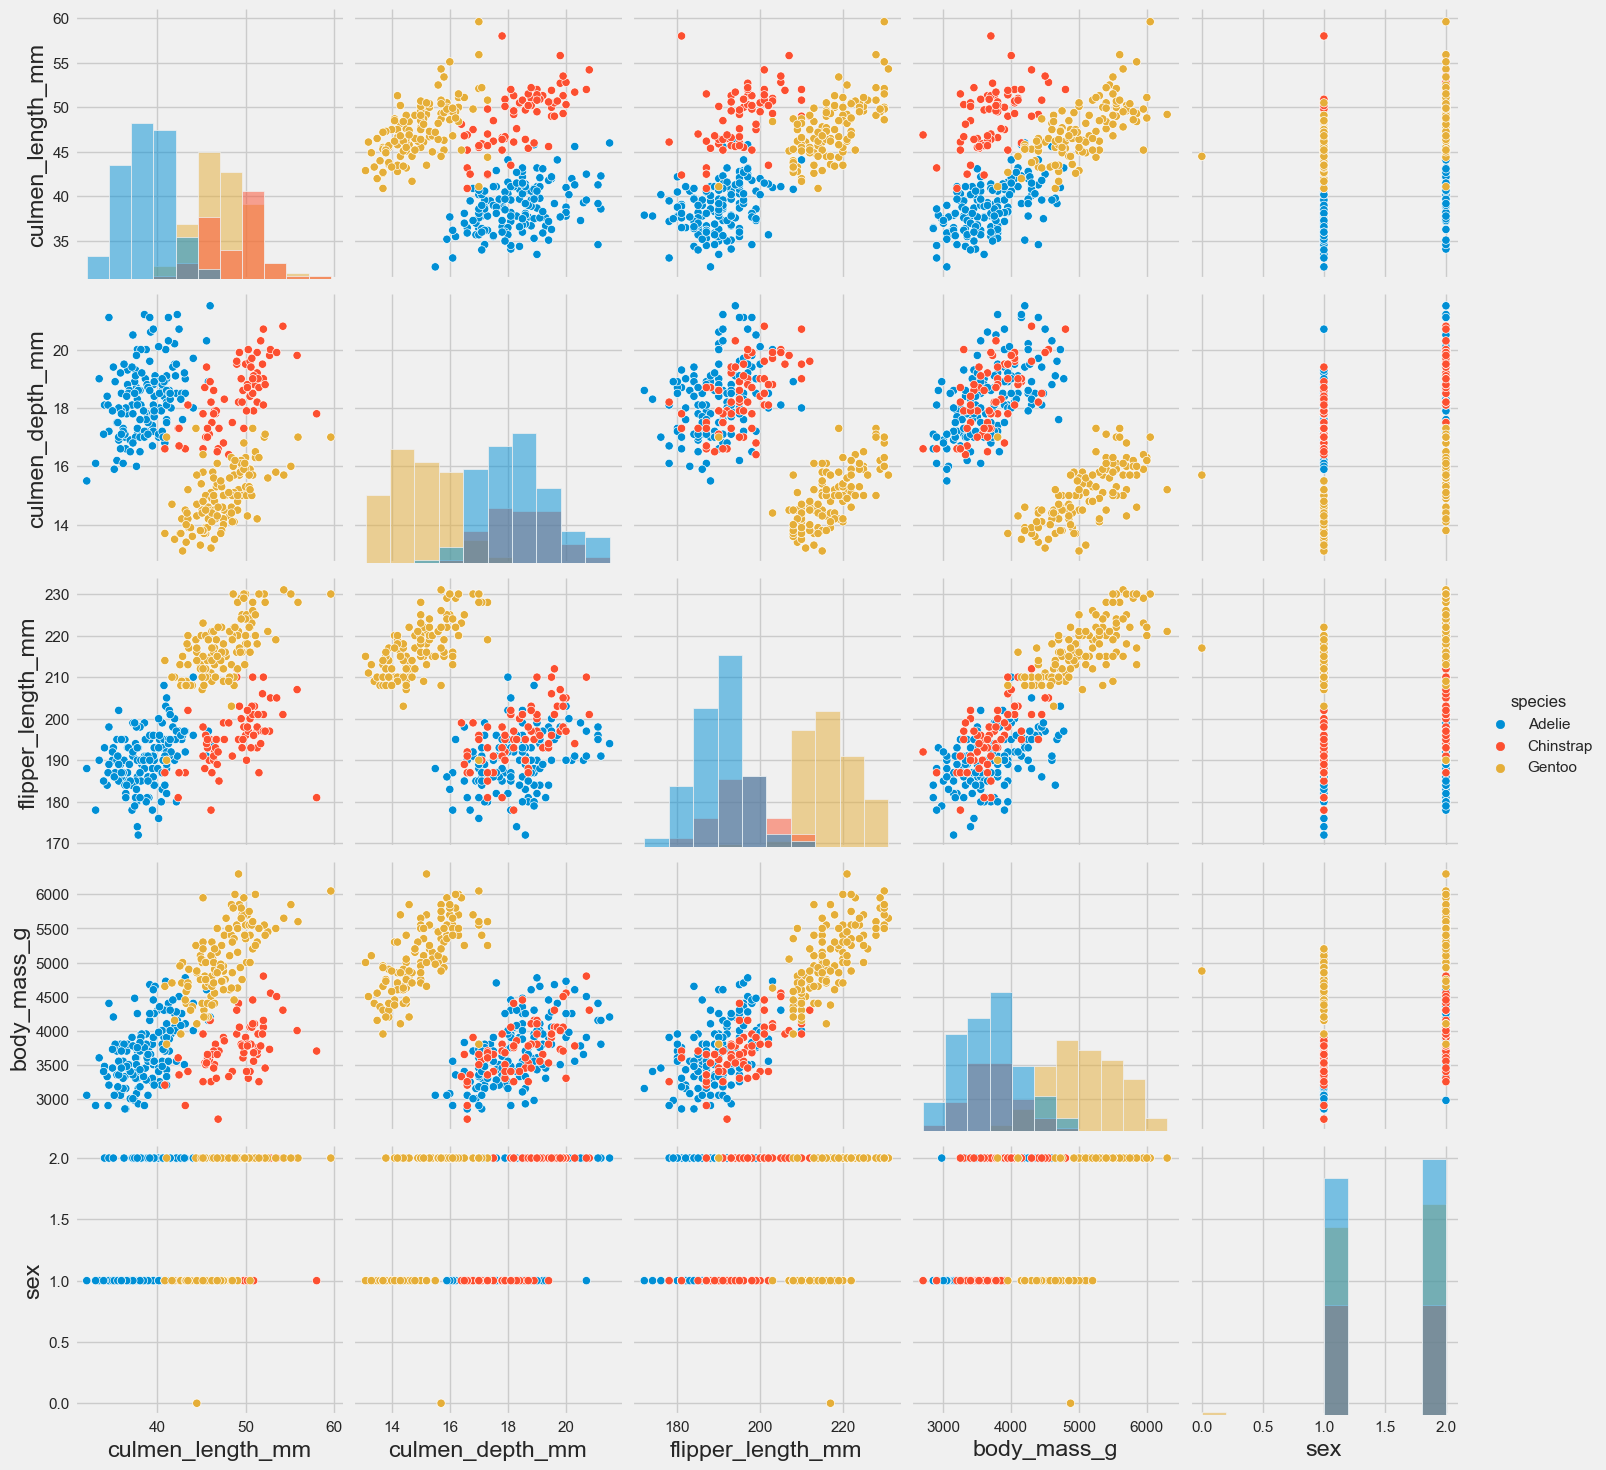

In [10]:
#full scatter de seaborn
sns.pairplot(df, hue="species", height=3 ,diag_kind="hist")

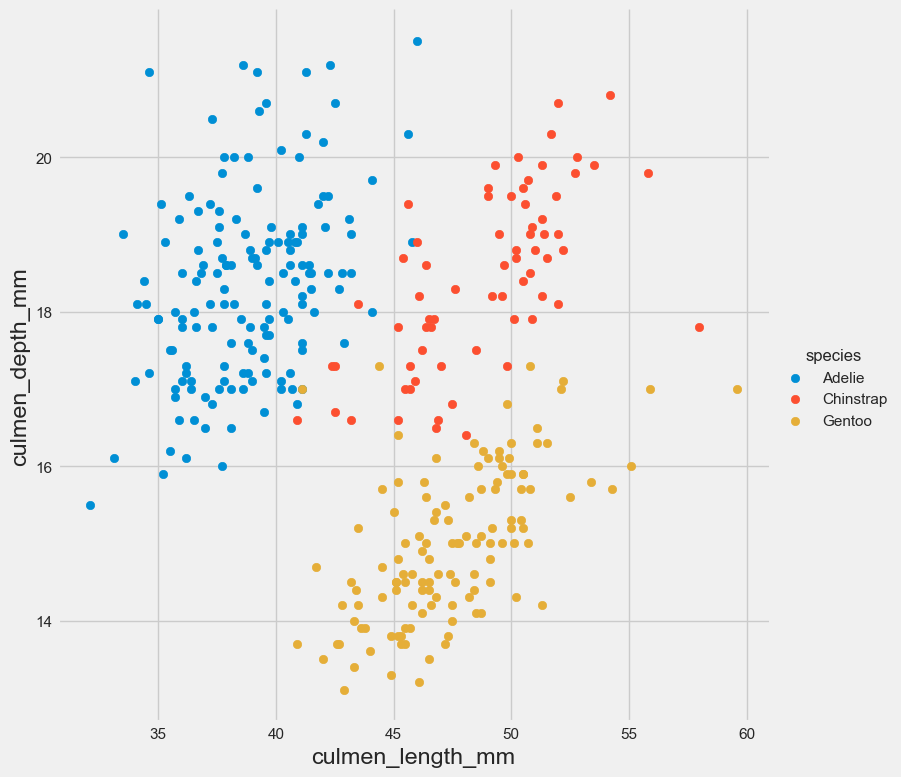

In [11]:
#seaborn standard scatter culmen_length vs culmen_depth
sns.FacetGrid(df, hue="species", height=8) \
    .map(plt.scatter, "culmen_length_mm", "culmen_depth_mm") \
    .add_legend()

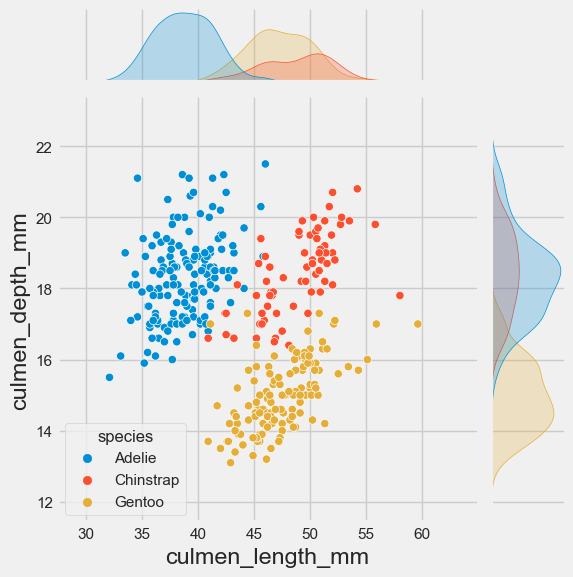

In [13]:
#juxtaposition scatter et densité
sns.jointplot(data=df, x="culmen_length_mm", y="culmen_depth_mm", hue="species")